In [3]:
import pandas as pd


In [7]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [8]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "NaN"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
print(meine_daten.topic_comment.value_counts())
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

# print(meine_daten.Username.value_counts())
# meine_daten.loc[meine_daten.Username == "Coraggioso-Ir6WKaaMR"]


politik                124
impfung                118
lockdown                96
maßnahmen               79
infektion               57
virus                   29
lockerung               28
wirtschaft              25
maskenpflicht           21
reise                   21
tests                   12
schulschliessung         8
usa                      8
demos                    8
homeoffice               7
quarantäne               7
reiseverbot              6
inzidenz                 4
china                    4
demo                     4
krise                    4
schulschließung          3
testen                   3
fußball                  3
konjunktur               3
antikörper               2
warnapp                  2
schulöffnung             2
ausgangssperre           2
tourismus                2
intensivstation          2
kontaktbeschränkung      2
RKI                      2
arbeit                   2
kontrolle                2
negative                 2
querdenker               2
i

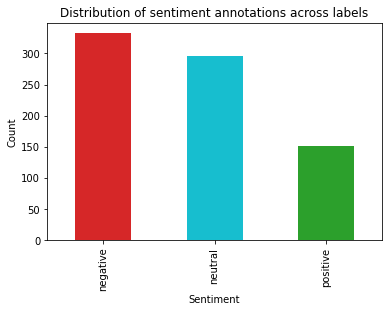

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


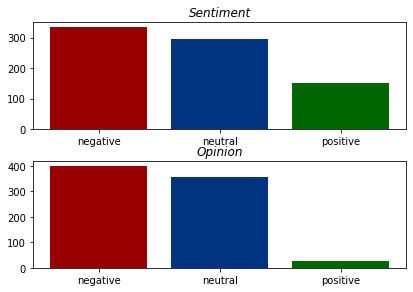

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [ ]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

# meine_daten.Sentiment.value_counts()

# meine_daten.loc[(meine_daten.Sentiment == "positive")]

In [3]:
import sklearn.metrics as metrics

In [13]:
sven_opinion = []
vali_opinion = []

sven_sentiment = []
vali_sentiment = []


with open ("annotated_data/svens_agreement.txt") as sven:
    for line in sven:
        sven_opinion.append(line.split("\t")[5])
        sven_sentiment.append(line.split("\t")[6])
with open ("annotated_data/vali_agreement.txt") as vali:
    for line in vali:
        vali_opinion.append(line.split("\t")[5])
        vali_sentiment.append(line.split("\t")[6])

print(sven_sentiment)
print(vali_sentiment)

print(metrics.cohen_kappa_score(sven_opinion, vali_opinion))
metrics.cohen_kappa_score(sven_sentiment, vali_sentiment)


['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral']
['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negat

0.6277145811789038